Author: Justin Mau
LRES 525 - Applied Remote Sensing

Import Python packages and load the prebuild model from DeepForest

In [ ]:
from deepforest import main
from deepforest import get_data
import matplotlib.pyplot as plt
import rasterio

model = main.deepforest()
model.use_release()

Simple test to run the model on a png. For some reason this png barely worked, other initial test images worked fine though.

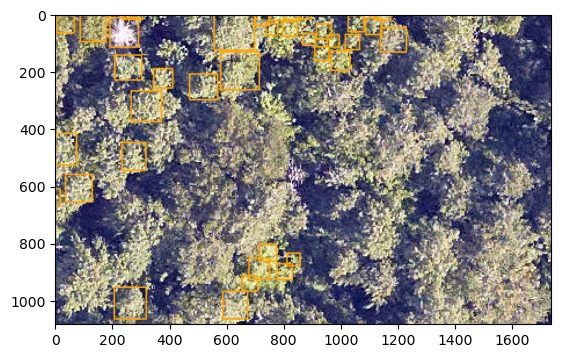

In [15]:
# load in the image (png)
image_path = get_data("/home/c28j316/Remote Sensing/Tree ID Project/plot_065_unmarked.png")

# generate predictions
img = model.predict_image(path=image_path, return_plot=True, color=(0, 165, 255), thickness=3)


# plots the predicted image
plt.imshow(img[:,:,::-1])

Now predicting on the raster of the chosen plot (Plot 065).
This will make the prediction and plot the predicted image.

/home/c28j316/.local/lib/python3.9/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/ ...
/home/c28j316/.local/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

340 predictions in overlapping windows, applying non-max supression
99 predictions kept after non-max suppression


/home/c28j316/.local/lib/python3.9/site-packages/deepforest/visualize.py:118: UserWarning: Input images must be channels last format [h, w, 3] not channels first [3, h, w], using np.rollaxis(image, 0, 3) to invert!
  warnings.warn("Input images must be channels last format [h, w, 3] not channels "


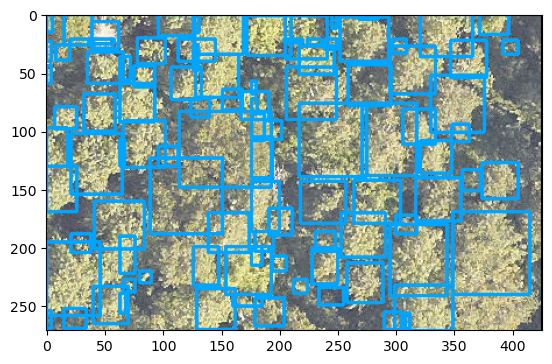

In [35]:
raster_path = "plot_065_tif.tif"

# Window size of 250px with an overlap of 75% among windows for this small tile.
# These values generally seemed to give me the best results, but could be tweaked more
predicted_raster = model.predict_tile(raster_path, return_plot = True, patch_size=250,patch_overlap=0.75, color=(0, 165, 255), thickness=2)

# View boxes overlayed when return_plot=True, when False, boxes are returned.
plt.imshow(predicted_raster)
plt.show()

Predict on the raster again, but this time saves the bounding boxes.

In [28]:
raster_path = "plot_065_tif.tif"

# Window size of 250px with an overlap of 0.1% among windows for this small tile.
boxes = model.predict_tile(raster_path, return_plot = False, patch_size=250,patch_overlap=0.1, color=(0, 165, 255), thickness=4)

/home/c28j316/.local/lib/python3.9/site-packages/lightning_fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/ ...
/home/c28j316/.local/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

176 predictions in overlapping windows, applying non-max supression
90 predictions kept after non-max suppression


Now need to convert the bounding boxes to use real coordinates

In [29]:
r = rasterio.open(raster_path)
transform = r.transform 
crs = r.crs
print(crs)

EPSG:32616


Converts and outputs the bounding boxes to a shapefile

In [30]:
from deepforest import utilities

gdf = utilities.annotations_to_shapefile(boxes, transform=transform, crs=crs)
#gdf = utilities.boxes_to_shapefile(predicted_raster)

# gets the bounding boxes from the prediction, exports to a shapefile 
gdf.to_file('boxes.shp', driver='ESRI Shapefile')

At this point, I export shapefile into ArcGIS, compare with observed tree points, see how many of them line up properly